In [29]:
import pandas as pd
import datetime
from pathlib import Path

import os
datadir = Path("../Data/").resolve().absolute()
print(datadir)
currency = "BTCUSD"
# forecasts_by_last_modified = sorted([f for f in datadir.glob("*_training_forecast.csv")], key=os.path.getmtime, reverse=True)
# print(forecasts_by_last_modified)
# currency = forecasts_by_last_modified[0].name.split("_")[0]
today = datetime.datetime.now().strftime("%Y_%m_%d")


C:\Users\karan\source\csharp\Crypto-Price-Forecaster\ForecasterCLI\Data


In [30]:
# Parse main file data into df
from datetime import datetime

dateparse = lambda x: datetime.strptime(x, "%Y-%m-%d")
main_file = datadir / f"{currency}.csv"

maindf = pd.read_csv(main_file, parse_dates=['Date'], date_parser=dateparse)

# Only keep two columns, and reverse the dataset (old to new)
maindf = maindf[["Date", "Last"]][::-1]

print(maindf)


           Date        Last
2717 2014-04-15    505.0000
2716 2014-04-16    538.0000
2715 2014-04-17    508.0000
2714 2014-04-18    482.7500
2713 2014-04-19    507.4999
...         ...         ...
4    2021-11-05  61148.0550
3    2021-11-06  61378.0000
2    2021-11-07  62912.1330
1    2021-11-08  67524.0000
0    2021-11-09  67011.0000

[2718 rows x 2 columns]


<AxesSubplot:xlabel='Date', ylabel='Last'>

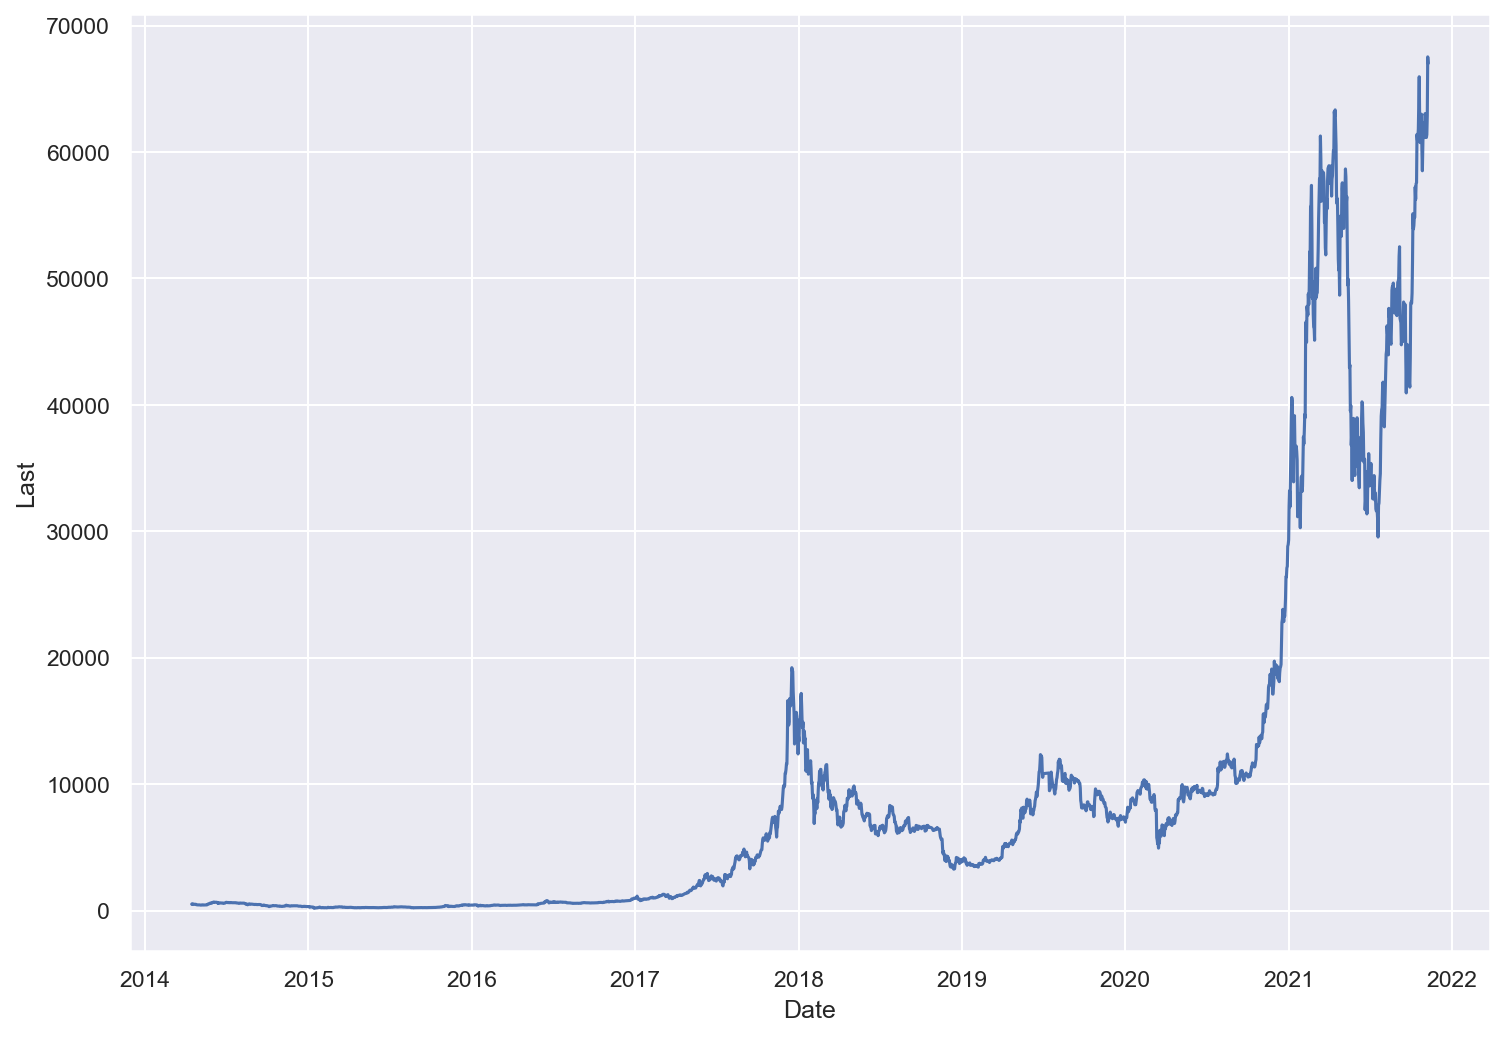

In [31]:
# Plot the main data
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns    

sns.set(rc={'figure.figsize':(11.7,8.27), 'figure.dpi': 150})

sns.lineplot(
    data=maindf, x="Date", y="Last", sort=False
)


In [32]:
testing_split = datadir / f"{currency}_testing_split.csv"
testdf = pd.read_csv(testing_split, parse_dates=['Date'], date_parser=dateparse)
print(testdf)

train_split = datadir / f"{currency}_training_split.csv"
traindf = pd.read_csv(train_split, parse_dates=['Date'], date_parser=dateparse)
print(traindf)


         Date       Last
0  2021-10-27  58517.000
1  2021-10-28  60600.000
2  2021-10-29  62295.000
3  2021-10-30  61408.000
4  2021-10-31  61412.400
5  2021-11-01  61140.000
6  2021-11-02  63034.000
7  2021-11-03  62859.000
8  2021-11-04  61218.000
9  2021-11-05  61148.055
10 2021-11-06  61378.000
11 2021-11-07  62912.133
12 2021-11-08  67524.000
13 2021-11-09  67011.000
           Date        Last
0    2014-04-15    505.0000
1    2014-04-16    538.0000
2    2014-04-17    508.0000
3    2014-04-18    482.7500
4    2014-04-19    507.4999
...         ...         ...
2713 2021-11-05  61148.0550
2714 2021-11-06  61378.0000
2715 2021-11-07  62912.1330
2716 2021-11-08  67524.0000
2717 2021-11-09  67011.0000

[2718 rows x 2 columns]


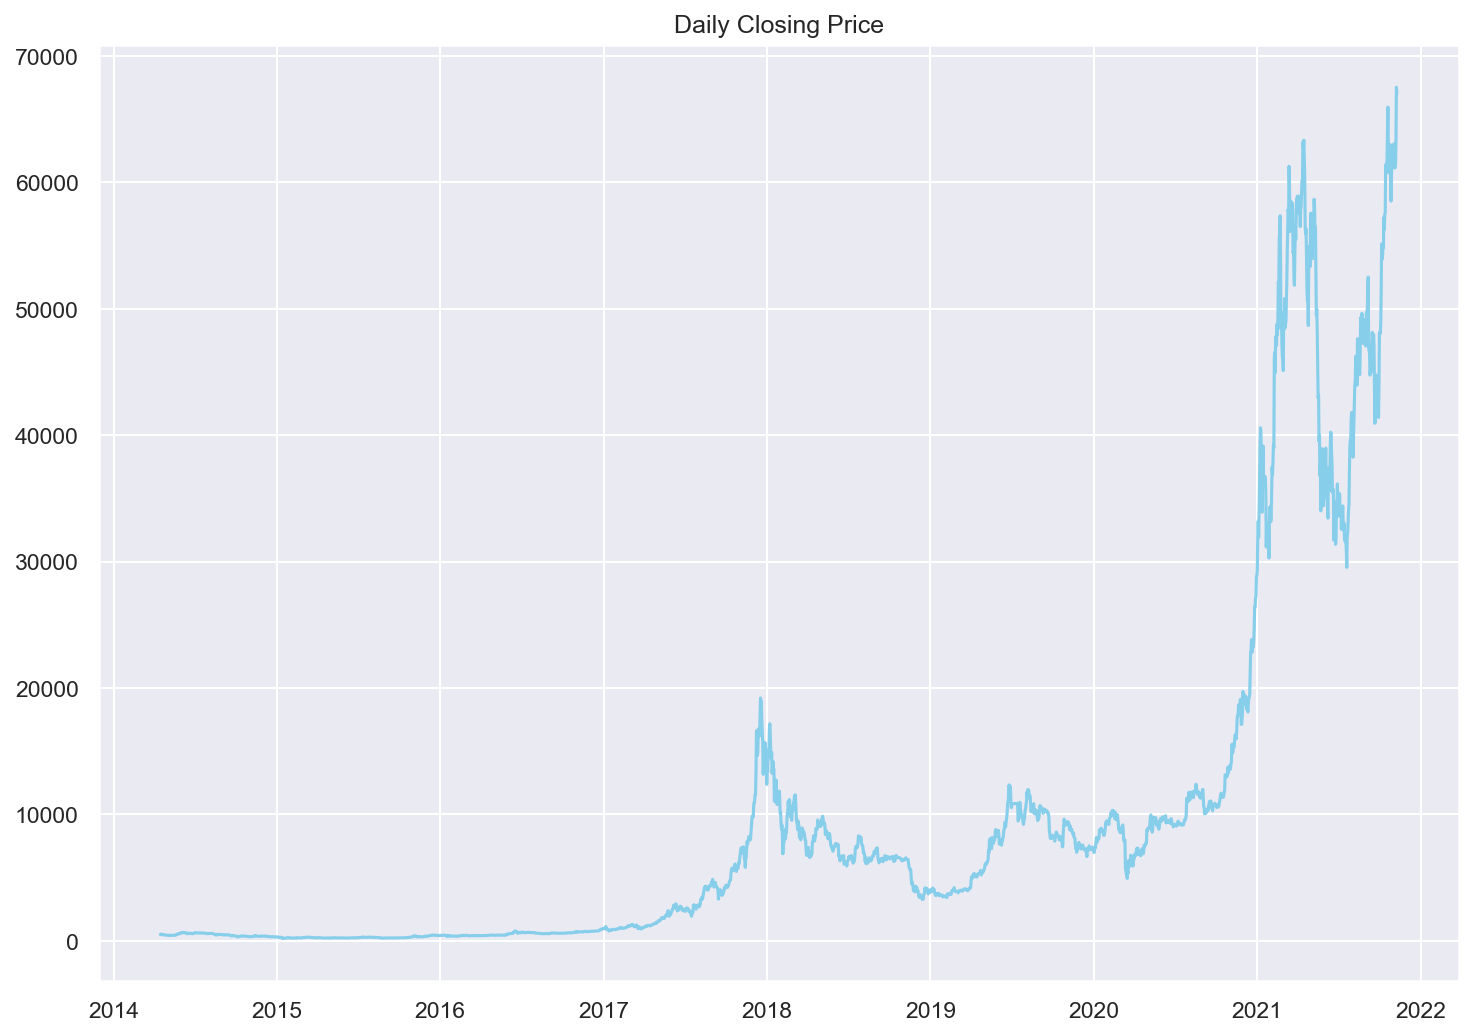

In [33]:

# sns.lineplot(
#     data=traindf, x="Date", y="Last", sort=False
# )

plt.title(f"Daily Closing Price")
plt.plot('Date', 'Last', data=traindf, color="skyblue", label="Closing")
plt.show()

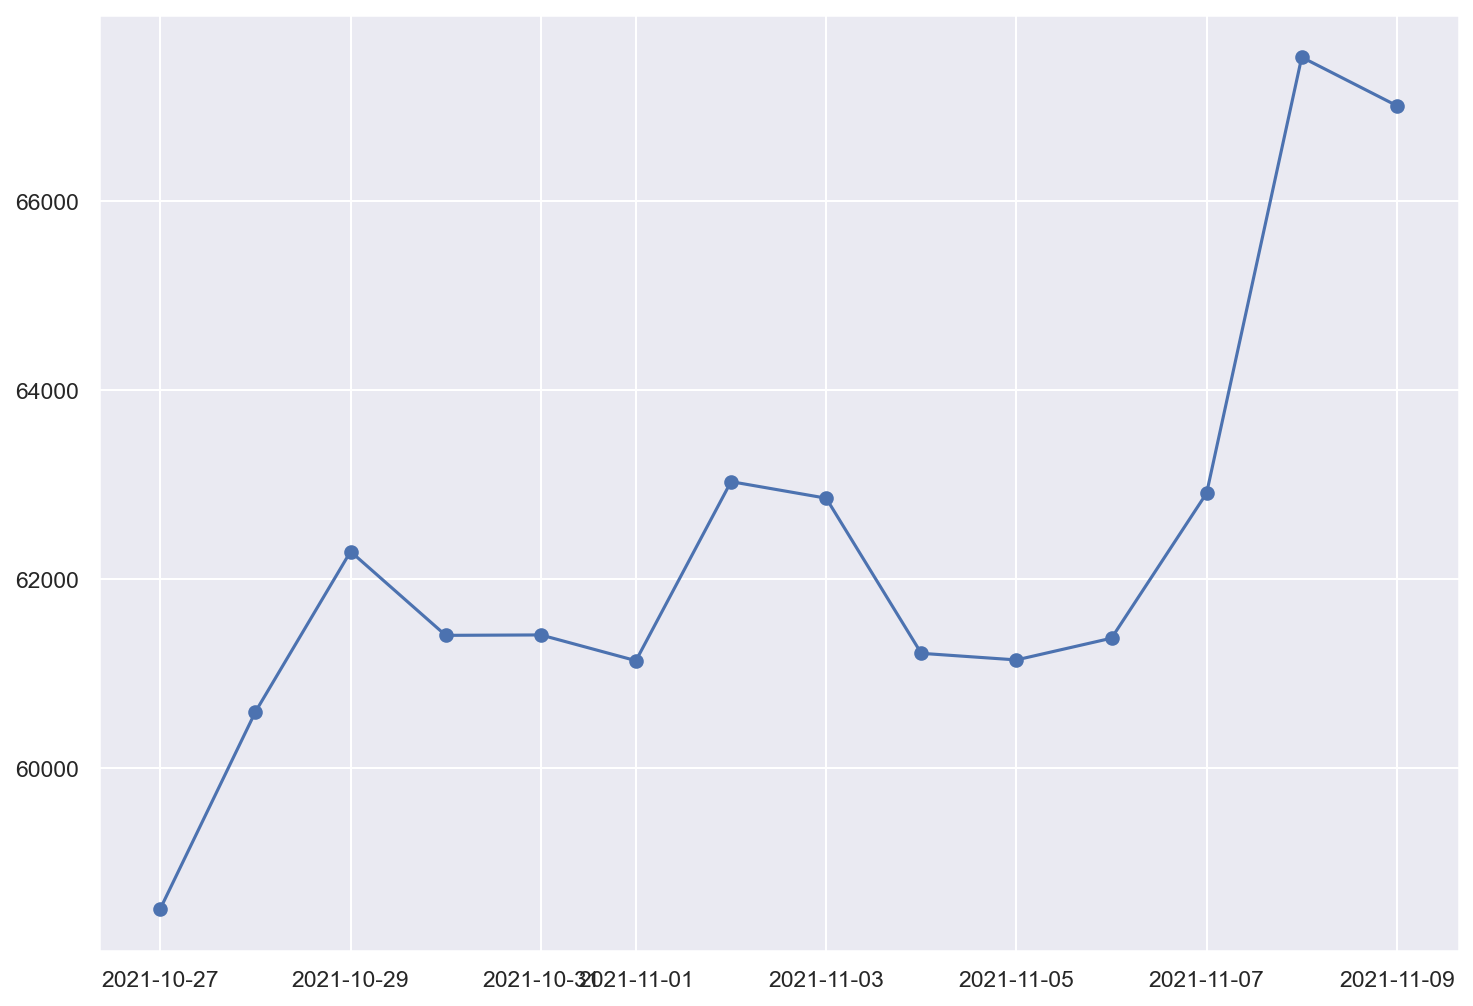

In [34]:
plt.plot(testdf["Date"], testdf["Last"], marker='o')

In [35]:
train_forecast_file = datadir / f"{currency}_training_forecast.csv"
train_fc_df = pd.read_csv(train_forecast_file, parse_dates=['Date'], date_parser=dateparse)
print(train_fc_df)


         Date   Forecast  LowerBound  UpperBound  BoundsDifference
0  2021-10-27  58937.210   57649.797   60224.625       1287.414062
1  2021-10-28  60394.380   56469.074   64319.684       3925.304688
2  2021-10-29  62868.530   57142.168   68594.890       5726.361328
3  2021-10-30  62239.508   55131.180   69347.836       7108.328125
4  2021-10-31  59958.016   51665.176   68250.860       8292.841797
5  2021-11-01  60147.400   50736.254   69558.550       9411.146484
6  2021-11-02  62059.010   51586.715   72531.305      10472.294922
7  2021-11-03  62645.530   51265.105   74025.960      11380.427734
8  2021-11-04  62132.350   49951.832   74312.875      12180.521484
9  2021-11-05  62104.820   49091.223   75118.414      13013.595703
10 2021-11-06  62953.420   49032.375   76874.470      13921.046875
11 2021-11-07  64368.617   49605.540   79131.695      14763.078125
12 2021-11-08  65221.150   49745.035   80697.266      15476.115234
13 2021-11-09  64722.766   48604.844   80840.690      16117.92

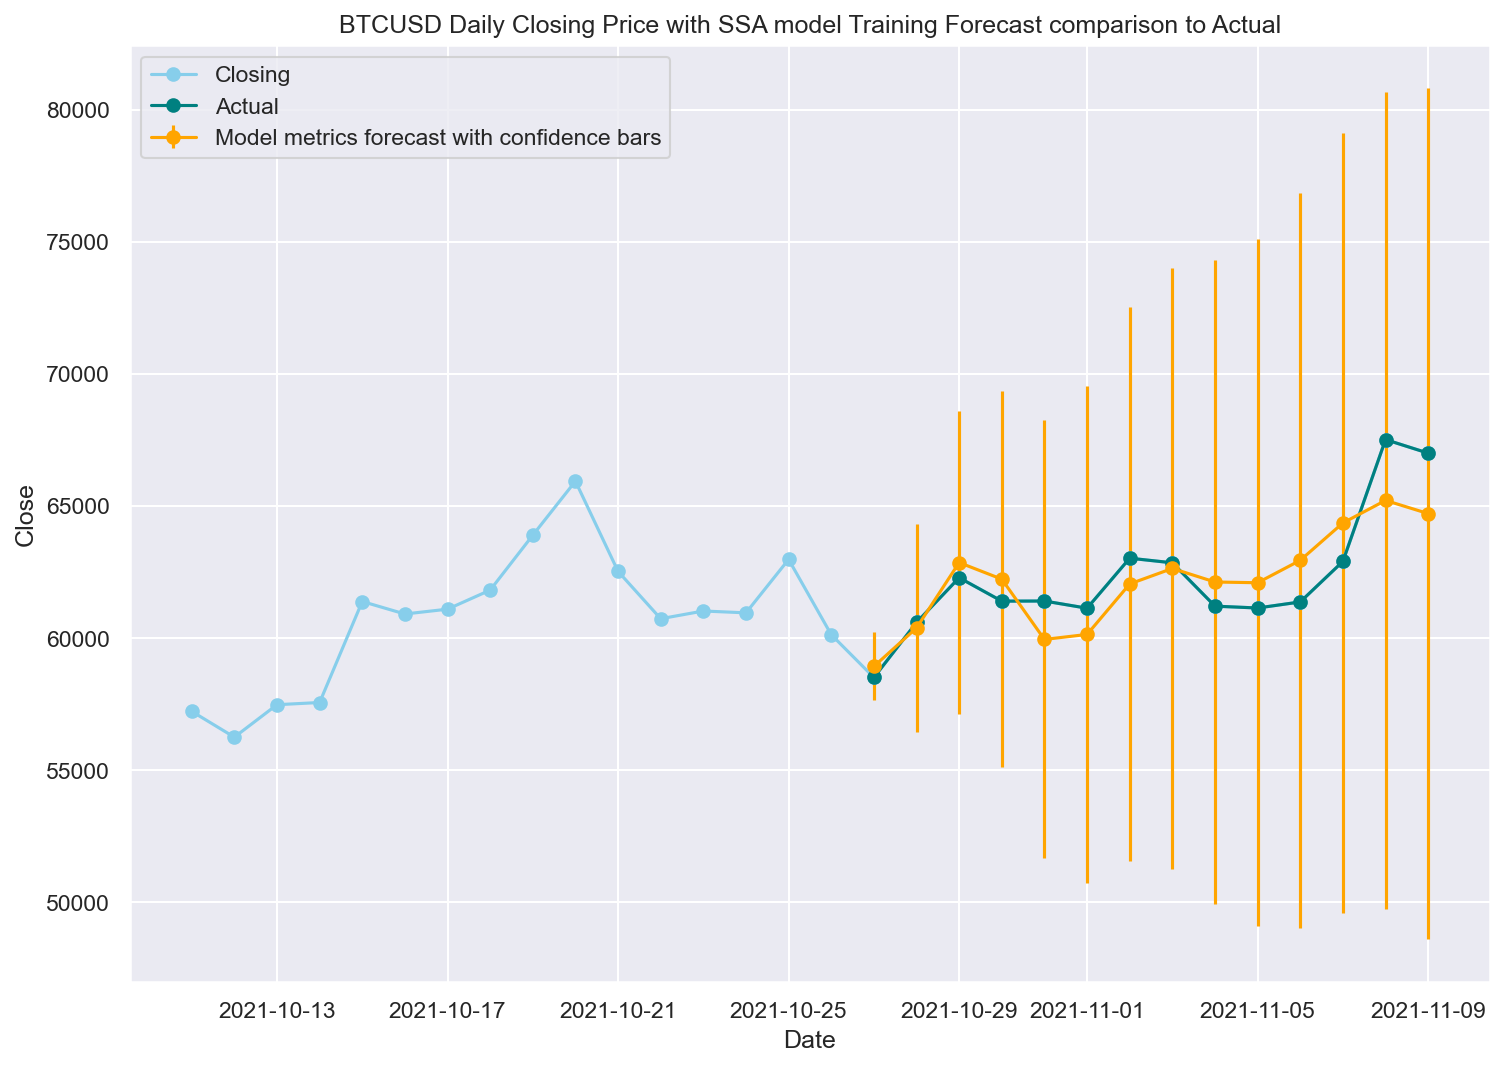

In [36]:

plt.title(f"{currency} Daily Closing Price with SSA model Training Forecast comparison to Actual")
plt.plot('Date', 'Last', data=traindf.tail(30), color="skyblue", marker='o', label="Closing")
plt.plot('Date', 'Last', data=testdf, marker='o', color='teal', label="Actual")
plt.errorbar('Date', 'Forecast', data=train_fc_df, marker='o', color='orange', label='Model metrics forecast with confidence bars', yerr=train_fc_df["BoundsDifference"])
plt.legend(loc='upper left')
plt.ylabel("Close")
plt.xlabel("Date")
plt.savefig(datadir.parent / "Graphs" / f'{currency}_training_forecast_{today}.png')
plt.show()

         Date   Forecast  LowerBound  UpperBound  BoundsDifference
0  2021-11-11  66285.040   64997.625   67572.450       1287.414062
1  2021-11-12  64519.492   60594.188   68444.800       3925.304688
2  2021-11-13  62081.156   56354.793   67807.516       5726.361328
3  2021-11-14  61441.133   54332.805   68549.460       7108.328125
4  2021-11-15  62332.812   54039.973   70625.660       8292.841797
5  2021-11-16  62231.516   52820.370   71642.664       9411.146484
6  2021-11-17  61431.610   50959.312   71903.910      10472.296875
7  2021-11-18  61339.695   49959.270   72720.125      11380.427734
8  2021-11-19  61597.400   49416.880   73777.920      12180.521484
9  2021-11-20  61716.906   48703.310   74730.500      13013.595703
10 2021-11-21  61822.227   47901.180   75743.270      13921.046875
11 2021-11-22  61175.156   46412.080   75938.234      14763.078125
12 2021-11-23  60262.830   44786.715   75738.945      15476.115234
13 2021-11-24  61139.710   45021.790   77257.630      16117.92

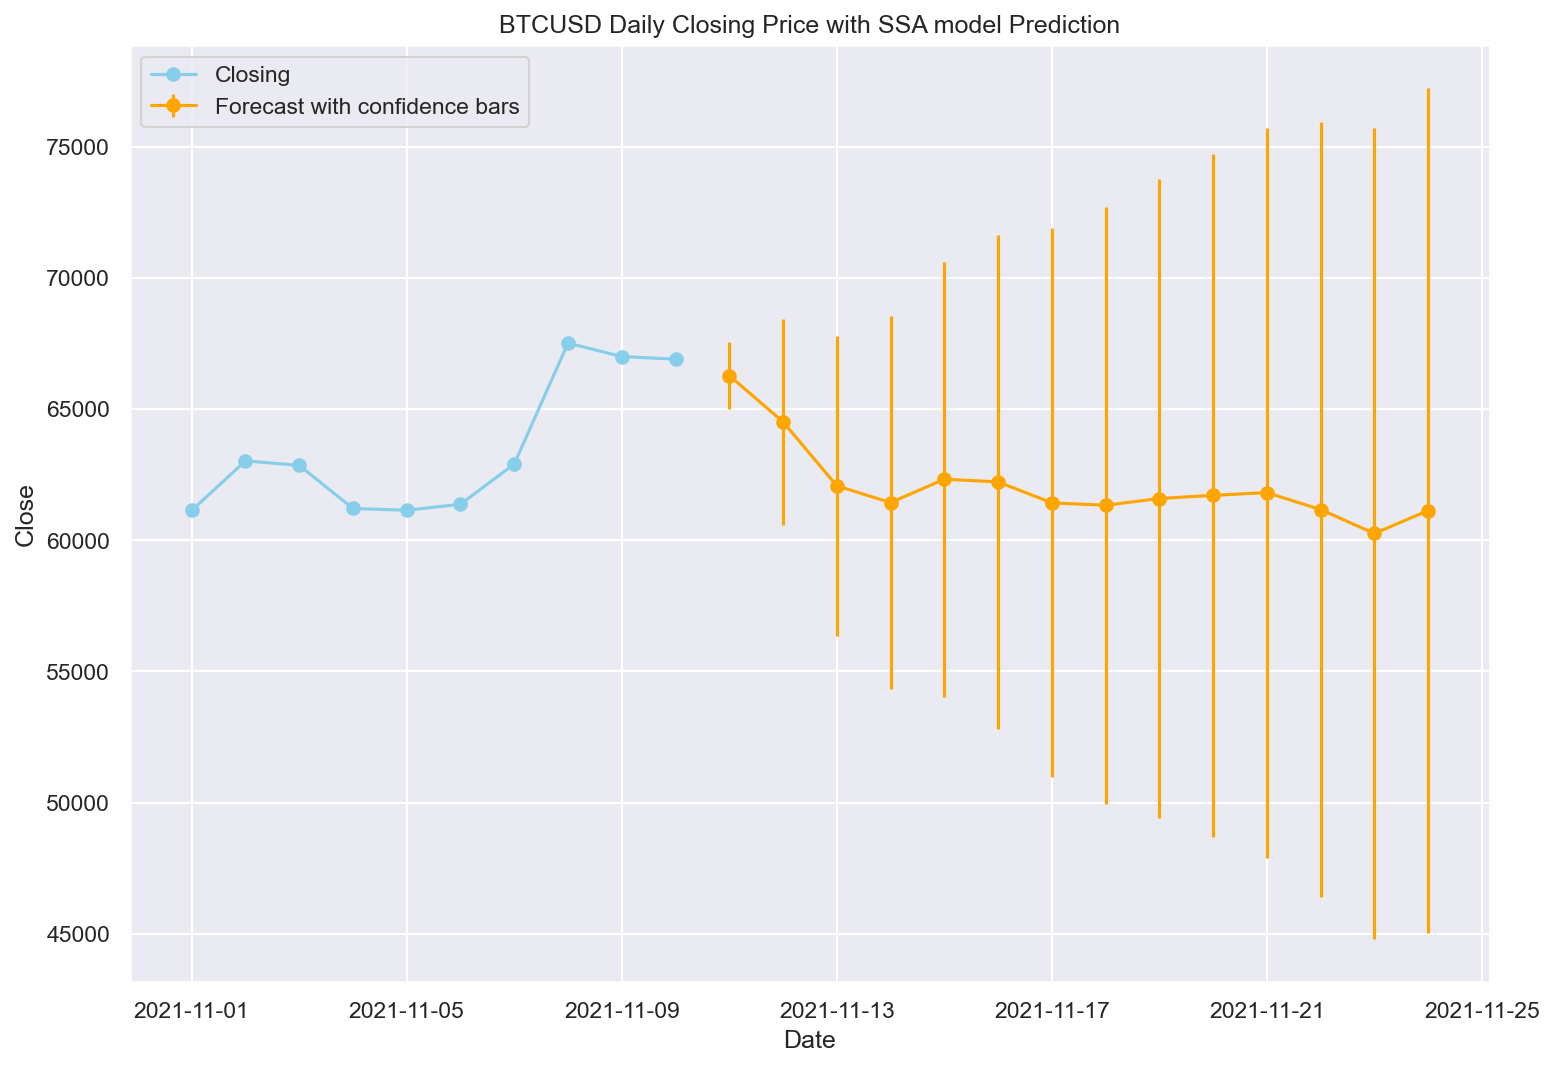

In [37]:

predict_dataset_file = datadir / f"{currency}_prediction_dataset.csv"
predict_forecast_file = datadir / f"{currency}_prediction_forecast.csv"
# import math
# pr_df = pd.read_csv(predict_dataset_file)
# print(pr_df)
# pr_df["Last"] = pr_df["Last"].apply(lambda x: math.log(x))
# pr_df.to_csv(predict_dataset_file, index=None)

if (predict_dataset_file.is_file() and predict_forecast_file.is_file()):
    predict_df = pd.read_csv(predict_dataset_file, parse_dates=['Date'], date_parser=dateparse)
    predict_fc_df = pd.read_csv(predict_forecast_file, parse_dates=['Date'], date_parser=dateparse)
    print(predict_fc_df)
    # Only keep two columns, and reverse the dataset (old to new)
    predict_df = predict_df[["Date", "Last"]][::-1]

    plt.title(f"{currency} Daily Closing Price with SSA model Prediction")
    plt.errorbar('Date', 'Forecast', data=predict_fc_df, marker='o', color='orange', label='Forecast with confidence bars', yerr=predict_fc_df["BoundsDifference"])
    plt.plot('Date', 'Last', data=predict_df.tail(10), color="skyblue", marker='o', label="Closing")
    plt.legend(loc='upper left')
    plt.ylabel("Close")
    plt.xlabel("Date")
    plt.savefig(datadir.parent / "Graphs" / f'{currency}_prediction_{today}.png')
    plt.show()
